In [1]:
from scipy.io import wavfile

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import pandas as pd

In [5]:
fig_size = (20, 10)
y_name, x_name = "LIGNES", "COLONNES"

def afficher_son(first_matrix, second_matrix, horiz=False, parts=True, message=None):

    if horiz: # affichage horizontal
        fig, (first_fig, second_fig) = plt.subplots(2, 1, figsize=fig_size)
    
    else: # affichage vertical
        fig, (first_fig, second_fig) = plt.subplots(1, 2, figsize=fig_size)
        
    
    # nom des figures
    figures_names = {first_fig: "First Matrix", second_fig:"Second Matrix"}
    
    def set_infos(color_fig):
        nonlocal message
        if not message:
            message = f"SonMatrix"
        
        message = f"{message}{first_matrix.shape}"
        
        color = figures_names[color_fig]
        title = f"{color} {message}"
        color_fig.set_title(title)
        color_fig.set_xlabel("COLONNES")
        color_fig.set_ylabel("LIGNES")
    
    set_infos(first_fig)
    first_fig.plot(first_matrix) 
    
    set_infos(second_fig)
    if parts:
        second_fig.plot(second_matrix, c='orange')
    else:
        second_fig.plot(second_matrix)
    
    plt.tight_layout()
    plt.show()

In [6]:
fichier_audio = "audio.wav"

In [7]:
#-----------------------------------------------------------------------------------
# TRANSFORMATION SIGNAL AUDIO EN TENSEUR
# ON AFFICHE LE TENSEUR AUDIO : TebseurAudio(lignes, colonnes)
# ON A UN TENSEUR 2D
#-----------------------------------------------------------------------------------

rate, matrice_audio = wavfile.read(filename=fichier_audio, mmap=False)


In [8]:
index = map(lambda idrows: f"Ligne{idrows+1}", range(matrice_audio.shape[0]))
tenseur = pd.DataFrame(matrice_audio, columns=['first_column', 'second_column'], index=index)

msg = (
    f"TenseurAudio{matrice_audio.shape}\n"
    f"{tenseur}"
)

print(msg)


TenseurAudio(705024, 2)
             first_column  second_column
Ligne1                  0              0
Ligne2                 -1              0
Ligne3                  0              0
Ligne4                  0              0
Ligne5                  0              0
Ligne6                  0              0
Ligne7                  0              0
Ligne8                  0              0
Ligne9                  0              0
Ligne10                 0              0
Ligne11                 0              0
Ligne12                 0              0
Ligne13                 0              0
Ligne14                 0              0
Ligne15                 0              0
Ligne16                 0              0
Ligne17                 0              0
Ligne18                 0              0
Ligne19                 0              0
Ligne20                 0              0
Ligne21                 0              0
Ligne22                 0              0
Ligne23                 0        

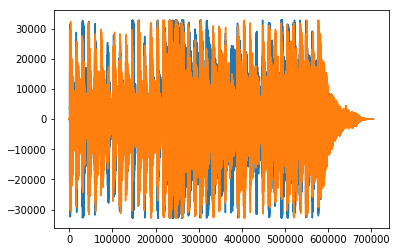

In [9]:
#-----------------------------------------------------------------------------------
# AFFICHAGES DU TENSEUR AUDIO
#-----------------------------------------------------------------------------------

plt.plot(matrice_audio)

In [10]:
#-----------------------------------------------------------------------------------
# SELECTION D'UNE PARTIE DU TENSEUR {LA MOITIER DU SIGNAL}
#-----------------------------------------------------------------------------------
all_parts = matrice_audio.shape[0]
first_part = int(all_parts/2)
part_matrix = matrice_audio[:first_part, :]

index = map(lambda idrows: f"Ligne{idrows+1}", range(part_matrix.shape[0]))
tenseur_part = pd.DataFrame(part_matrix, columns=['first_column(Y)', 'second_column(X)'], index=index)

msg = (
    f"{all_parts} / 2 = {all_parts/2}\n"
    f"TenseurAudio{part_matrix.shape}\n"
    f"{tenseur_part}"
)
print(msg)

705024 / 2 = 352512.0
TenseurAudio(352512, 2)
             first_column(Y)  second_column(X)
Ligne1                     0                 0
Ligne2                    -1                 0
Ligne3                     0                 0
Ligne4                     0                 0
Ligne5                     0                 0
Ligne6                     0                 0
Ligne7                     0                 0
Ligne8                     0                 0
Ligne9                     0                 0
Ligne10                    0                 0
Ligne11                    0                 0
Ligne12                    0                 0
Ligne13                    0                 0
Ligne14                    0                 0
Ligne15                    0                 0
Ligne16                    0                 0
Ligne17                    0                 0
Ligne18                    0                 0
Ligne19                    0                 0
Ligne20       

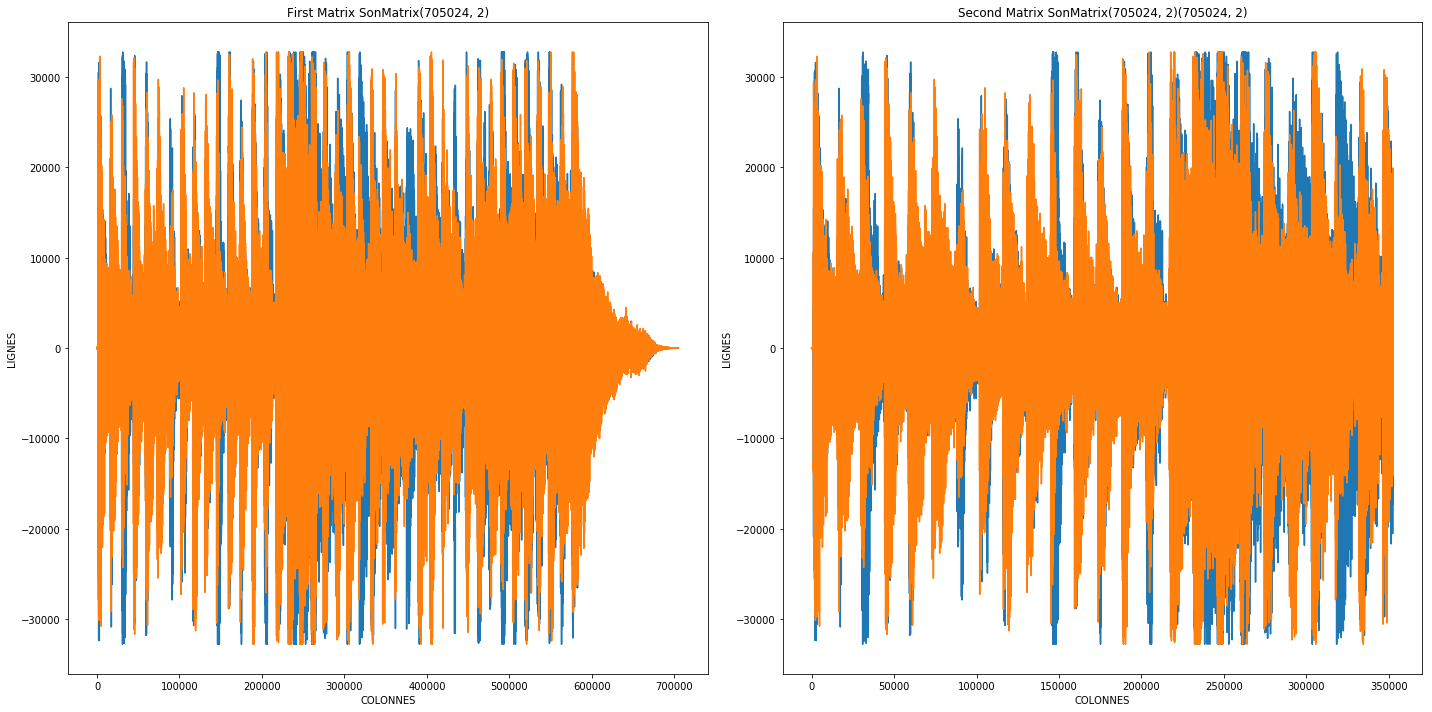

In [11]:
#-----------------------------------------------------------------------------------
# AFFICHAGE DU TENSEUR DE DEPART ET DE LA MOITIER DES LIGNES DU TENSEUR
#-----------------------------------------------------------------------------------

afficher_son(matrice_audio, part_matrix,parts=False)


In [12]:
#-----------------------------------------------------------------------------------
# ON SEPARE LES 2COLONNES DU TENSEUR AUDIO
#-----------------------------------------------------------------------------------

# VECTEUR DE COLONNE 1
first_column = matrice_audio[:, 0]

# VECTEUR DE COLONNE 2
second_column = matrice_audio[:, 1]


In [13]:
#-----------------------------------------------------------------------------------
# SELECTION D'UNE PARTIE DU TENSEUR {LA MOITIER DU SIGNAL}
#-----------------------------------------------------------------------------------
wavfile.write(filename="first_column_vector.wav", data=first_column, rate=rate)
wavfile.write(filename="second_column_vector.wav", data=second_column, rate=rate)


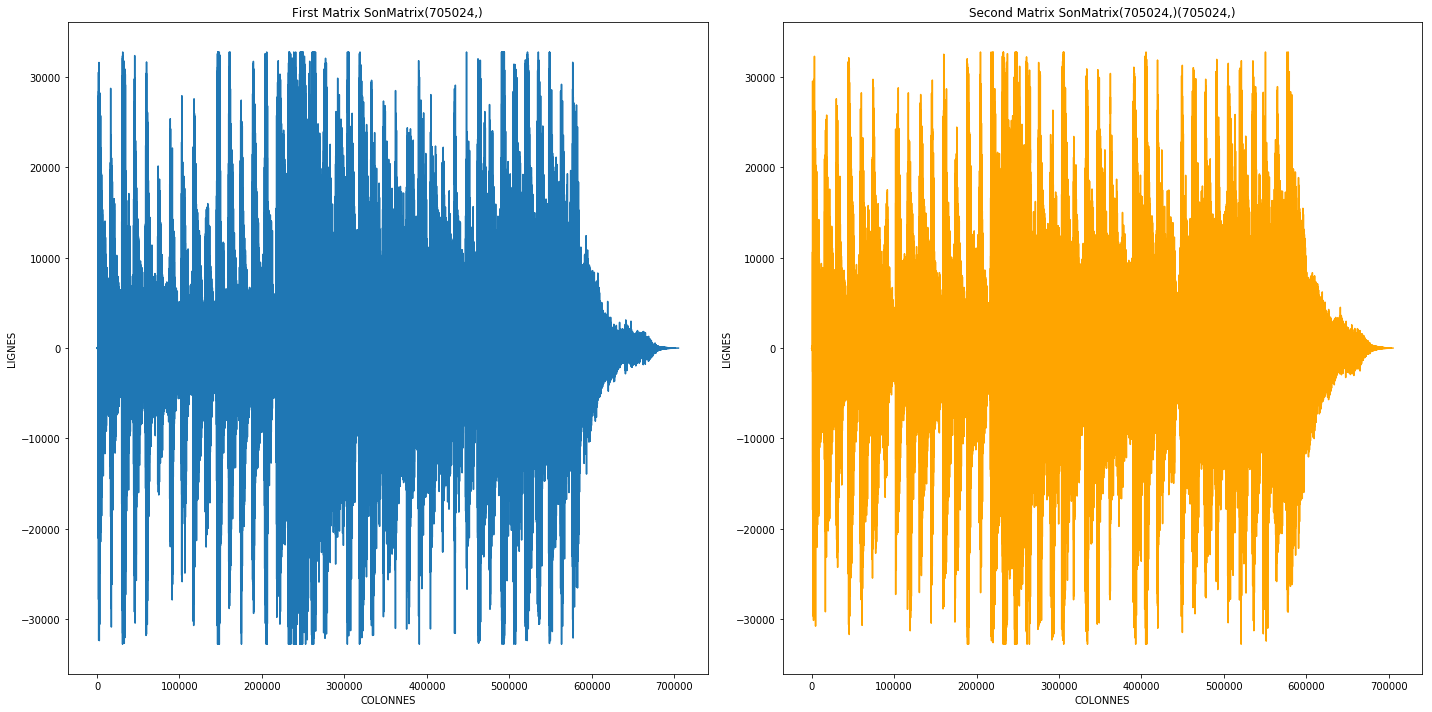

In [14]:
# ON AFFICHE LES 2 VECTEURS
afficher_son(first_column, second_column)

In [15]:
wavfile.write(filename="coupure.wav", data=part_matrix, rate=rate)

In [16]:
first_column_transpose = first_column.transpose()
second_column_transpose = second_column.transpose()

In [17]:
wavfile.write(filename="first_column_transpose.wav", data=first_column_transpose, rate=rate)
wavfile.write(filename="first_column_transpose.wav", data=second_column_transpose, rate=rate)

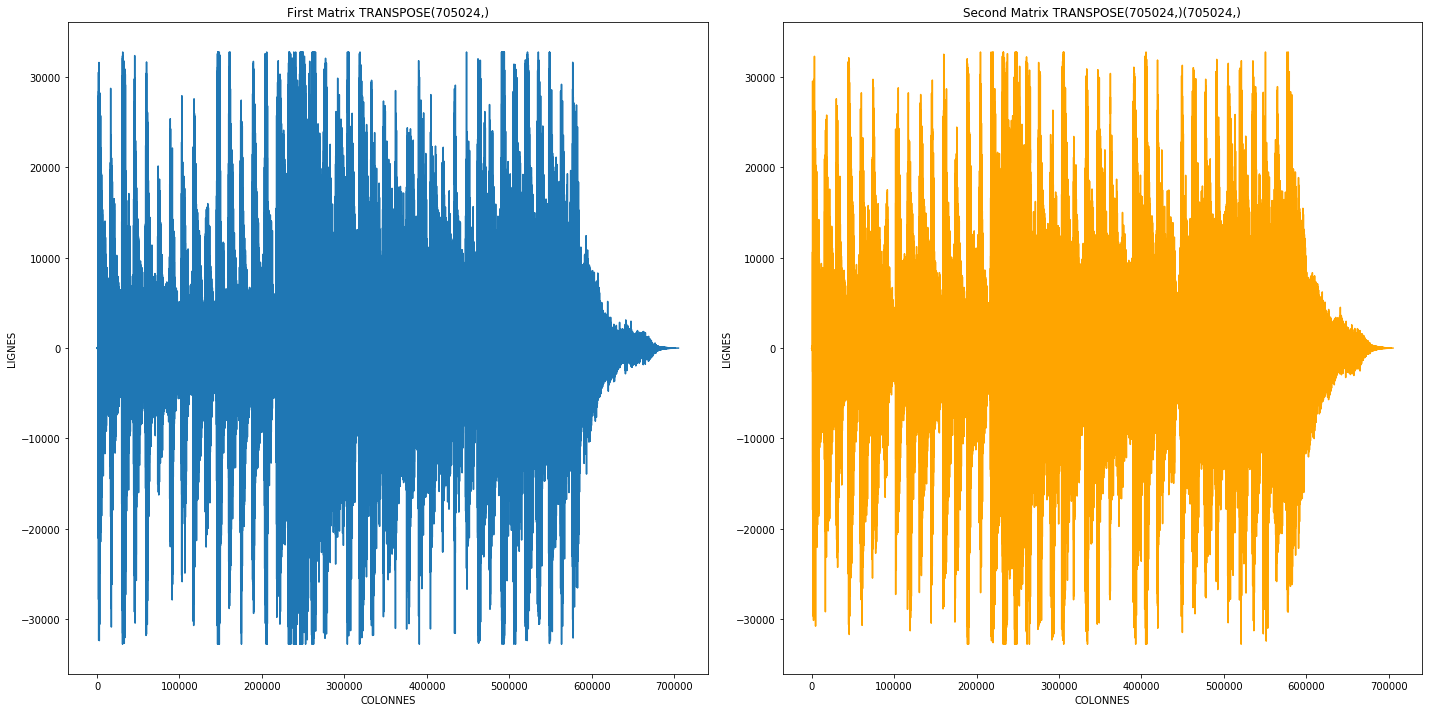

In [18]:
afficher_son(first_column_transpose, second_column_transpose, message="TRANSPOSE")